In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from pprint import pprint
import datetime
from scipy import stats
import os

print(os.listdir("Resources/names"))

['yob2000.txt', 'yob2014.txt', 'yob2015.txt', 'yob2001.txt', 'yob2017.txt', 'yob2003.txt', 'yob2002.txt', 'yob2016.txt', 'yob2012.txt', 'yob2006.txt', 'yob2007.txt', 'yob2013.txt', 'yob2005.txt', 'yob2011.txt', 'yob2010.txt', 'yob2004.txt', 'yob1973.txt', 'yob1998.txt', 'yob1999.txt', 'yob1972.txt', 'yob1970.txt', 'yob1971.txt', 'yob1975.txt', 'yob1974.txt', 'yob1976.txt', 'yob1989.txt', 'yob1988.txt', 'yob1977.txt', 'yob1991.txt', 'yob1985.txt', 'yob1984.txt', 'yob1990.txt', 'yob1979.txt', 'yob1986.txt', 'yob1992.txt', 'yob1993.txt', 'yob1987.txt', 'yob1978.txt', 'yob1983.txt', 'yob1997.txt', 'yob1996.txt', 'yob1982.txt', 'yob1994.txt', 'yob1980.txt', 'yob1981.txt', 'yob1995.txt', 'yob2009.txt', '.ipynb_checkpoints', 'yob2008.txt', 'NationalReadMe.pdf']


In [2]:
year = []
for filename in os.listdir("Resources/names"):
    if 'yob20' in filename:
        namefile = pd.read_csv(f"Resources/names/{filename}",header=None)
        namefile['year'] = os.path.splitext(filename)[0][-4:]
        year.append(namefile)

#data is in series, merge all years together
df = pd.concat(year)

In [3]:
df.head()

,0,1,2,year
0,Emily,F,25953,2000
1,Hannah,F,23080,2000
2,Madison,F,19967,2000
3,Ashley,F,17997,2000
4,Sarah,F,17697,2000


In [4]:
name_df = df.rename(columns={
    0:'name',
    1:'gender',
    2:'count'
})
name_df.head()

,name,gender,count,year
0,Emily,F,25953,2000
1,Hannah,F,23080,2000
2,Madison,F,19967,2000
3,Ashley,F,17997,2000
4,Sarah,F,17697,2000


In [5]:
name_df.dtypes

name      object
gender    object
count      int64
year      object
dtype: object

In [6]:
#count of total babies born in the year
yearTotal_df = name_df.groupby('year').sum().rename(columns={'count':'yearTotal'})

In [7]:
yearTotal_df.head()

,yearTotal
year,
2000,3778079
2001,3741451
2002,3736042
2003,3799971
2004,3818361


In [8]:
#merge total babies born in year and unique names
name_df = name_df.merge(yearTotal_df,on='year')
name_df.head()

,name,gender,count,year,yearTotal
0,Emily,F,25953,2000,3778079
1,Hannah,F,23080,2000,3778079
2,Madison,F,19967,2000,3778079
3,Ashley,F,17997,2000,3778079
4,Sarah,F,17697,2000,3778079


In [9]:
#Calculate % of name
name_df['name_percent'] = 100*(name_df.loc[:,'count']/name_df.loc[:,'yearTotal'])
name_df.head()

,name,gender,count,year,yearTotal,name_percent
0,Emily,F,25953,2000,3778079,0.686936
1,Hannah,F,23080,2000,3778079,0.610892
2,Madison,F,19967,2000,3778079,0.528496
3,Ashley,F,17997,2000,3778079,0.476353
4,Sarah,F,17697,2000,3778079,0.468413


In [117]:
#Get top 5 female names in year 2011
female_y2011 = name_df[(name_df['gender']=='F') & (name_df['year']=='2011')] 
female_y2011 = female_y2011.sort_values('name_percent',ascending=False)
female_y2011['rank'] = female_y2011['name_percent'].rank(ascending=False)
female_y2011.head(10)

,name,gender,count,year,yearTotal,name_percent,rank
422137,Sophia,F,21837,2011,3651914,0.597960,1.0
422138,Isabella,F,19901,2011,3651914,0.544947,2.0
422139,Emma,F,18797,2011,3651914,0.514716,3.0
422140,Olivia,F,17321,2011,3651914,0.474299,4.0
422141,Ava,F,15496,2011,3651914,0.424325,5.0
422142,Emily,F,14251,2011,3651914,0.390234,6.0
422143,Abigail,F,13247,2011,3651914,0.362741,7.0
422144,Madison,F,12381,2011,3651914,0.339028,8.0
422145,Mia,F,11527,2011,3651914,0.315643,9.0
422146,Chloe,F,10988,2011,3651914,0.300883,10.0


In [33]:
#Rank 2017 females
female_y2017 = name_df[(name_df['gender']=='F') & (name_df['year']=='2017')] 
female_y2017 = female_y2017.sort_values('name_percent',ascending=False)
female_y2017['rank'] = female_y2017['name_percent'].rank(ascending=False)
female_y2017.head(10)

,name,gender,count,year,yearTotal,name_percent,rank
126364,Emma,F,19738,2017,3546301,0.556580,1.0
126365,Olivia,F,18632,2017,3546301,0.525393,2.0
126366,Ava,F,15902,2017,3546301,0.448411,3.0
126367,Isabella,F,15100,2017,3546301,0.425796,4.0
126368,Sophia,F,14831,2017,3546301,0.418210,5.0
126369,Mia,F,13437,2017,3546301,0.378902,6.0
126370,Charlotte,F,12893,2017,3546301,0.363562,7.0
126371,Amelia,F,11800,2017,3546301,0.332741,8.0
126372,Evelyn,F,10675,2017,3546301,0.301018,9.0
126373,Abigail,F,10551,2017,3546301,0.297521,10.0


In [42]:
#merge 2011 vs 2017
merge_female = female_y2011.merge(female_y2017,on='name',suffixes=('_y2011','_y2017'))
merge_female['rankChange'] = merge_female['rank_y2011'] - merge_female['rank_y2017']
merge_female.head(10)

,name,gender_y2011,count_y2011,year_y2011,yearTotal_y2011,name_percent_y2011,rank_y2011,gender_y2017,count_y2017,year_y2017,yearTotal_y2017,name_percent_y2017,rank_y2017,rankChange
0,Sophia,F,21837,2011,3651914,0.597960,1.0,F,14831,2017,3546301,0.418210,5.0,-4.0
1,Isabella,F,19901,2011,3651914,0.544947,2.0,F,15100,2017,3546301,0.425796,4.0,-2.0
2,Emma,F,18797,2011,3651914,0.514716,3.0,F,19738,2017,3546301,0.556580,1.0,2.0
3,Olivia,F,17321,2011,3651914,0.474299,4.0,F,18632,2017,3546301,0.525393,2.0,2.0
4,Ava,F,15496,2011,3651914,0.424325,5.0,F,15902,2017,3546301,0.448411,3.0,2.0
5,Emily,F,14251,2011,3651914,0.390234,6.0,F,9746,2017,3546301,0.274822,12.0,-6.0
6,Abigail,F,13247,2011,3651914,0.362741,7.0,F,10551,2017,3546301,0.297521,10.0,-3.0
7,Madison,F,12381,2011,3651914,0.339028,8.0,F,7847,2017,3546301,0.221273,17.0,-9.0
8,Mia,F,11527,2011,3651914,0.315643,9.0,F,13437,2017,3546301,0.378902,6.0,3.0
9,Chloe,F,10988,2011,3651914,0.300883,10.0,F,6912,2017,3546301,0.194907,22.0,-12.0


In [56]:
#dataframe for top 5 and top 10 Y2011 females only
top5_df = merge_female.head(5)

top10_df = merge_female.head(10)
top10_df

,name,gender_y2011,count_y2011,year_y2011,yearTotal_y2011,name_percent_y2011,rank_y2011,gender_y2017,count_y2017,year_y2017,yearTotal_y2017,name_percent_y2017,rank_y2017,rankChange
0,Sophia,F,21837,2011,3651914,0.597960,1.0,F,14831,2017,3546301,0.418210,5.0,-4.0
1,Isabella,F,19901,2011,3651914,0.544947,2.0,F,15100,2017,3546301,0.425796,4.0,-2.0
2,Emma,F,18797,2011,3651914,0.514716,3.0,F,19738,2017,3546301,0.556580,1.0,2.0
3,Olivia,F,17321,2011,3651914,0.474299,4.0,F,18632,2017,3546301,0.525393,2.0,2.0
4,Ava,F,15496,2011,3651914,0.424325,5.0,F,15902,2017,3546301,0.448411,3.0,2.0
5,Emily,F,14251,2011,3651914,0.390234,6.0,F,9746,2017,3546301,0.274822,12.0,-6.0
6,Abigail,F,13247,2011,3651914,0.362741,7.0,F,10551,2017,3546301,0.297521,10.0,-3.0
7,Madison,F,12381,2011,3651914,0.339028,8.0,F,7847,2017,3546301,0.221273,17.0,-9.0
8,Mia,F,11527,2011,3651914,0.315643,9.0,F,13437,2017,3546301,0.378902,6.0,3.0
9,Chloe,F,10988,2011,3651914,0.300883,10.0,F,6912,2017,3546301,0.194907,22.0,-12.0


In [166]:
#set color for positive and negative change

changes = []
changes = top10_df['rankChange']

colors = []
for value in range(0,len(top10_df)):
    if changes[value] < 0:
        colors.append('red')
    else:
        colors.append('green')
colors

['red', 'red', 'green', 'green', 'green', 'red', 'red', 'red', 'green', 'red']

In [167]:
changes

0    -4.0
1    -2.0
2     2.0
3     2.0
4     2.0
5    -6.0
6    -3.0
7    -9.0
8     3.0
9   -12.0
Name: rankChange, dtype: float64

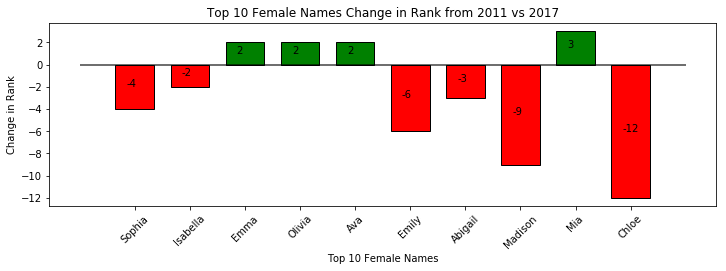

In [169]:
# Orient widths. Add labels, tick marks, etc. 
plt.figure(figsize=(10,3.5))
barchart = plt.bar(top10_df['name'],height=changes,color=colors,width=0.7,edgecolor='black')
plt.xticks(rotation=45)
plt.tight_layout()
plt.hlines(0,-1,10,alpha=0.75)
plt.title('Top 10 Female Names Change in Rank from 2011 vs 2017')
plt.ylabel('Change in Rank')
plt.xlabel('Top 10 Female Names')

# Use functions to label the percentages of changes
def makeLabel(barchart):
    for value in barchart:
        plt.text(x=value.get_x()+0.2,y=value.get_height()/2,s=int(value.get_height()))

# Call functions to implement the function calls
makeLabel(barchart)

# Save figure
plt.savefig("Graph_Images/GoT/Top10Female_Rank.png")

# Show the Figure
plt.show()

In [170]:
#Find names from 2011
#Arya (aka Arya Stark): Noble
#Arianne (aka Arianne Martell): Very holy one
#Asha (aka Asha Greyjoy): Life
#Brienne (aka Brienne of Tarth): Strong
#Catelyn (aka Cat Stark): Pure
#Cersei (aka Cersei Lannister): Enchantress
#Daenerys (aka Daenerys Targaryen): Born of the storm
#Ella (aka Ellaria Sand): Beautiful fairy
#Elia (aka Elia Sand): Jehovah is God
#Gilly (aka Gilly Craster): My joy

got_top10 = ['Arya','Arianne','Asha','Brienne','Catelyn','Cersei','Daenerys','Ella','Elia','Gilly']
got_female_df = merge_female.loc[merge_female['name'].isin(got_top10)]
got_female_df = got_female_df[['name','rank_y2011','rank_y2017','rankChange']]
got_female_df = got_female_df.reset_index()        



In [171]:
got_female_df

,index,name,rank_y2011,rank_y2017,rankChange
0,11,Ella,12.0,16.0,-4.0
1,713,Arya,714.0,135.0,579.0
2,1197,Asha,1196.5,1175.5,21.0
3,1299,Elia,1299.5,1085.5,214.0
4,2230,Catelyn,2222.5,4731.0,-2508.5
5,2743,Arianne,2739.0,2568.0,171.0
6,8159,Brienne,8392.0,4232.0,4160.0


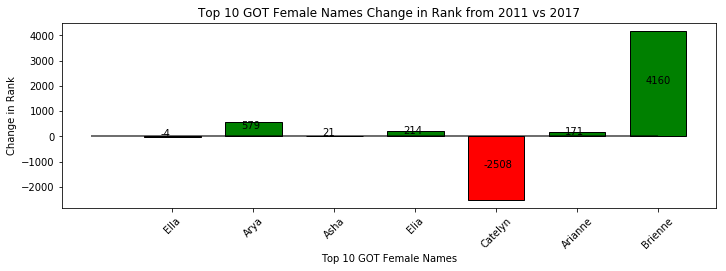

In [173]:
#set color for positive and negative change

changes = []
changes = got_female_df['rankChange']

colors = []
for value in range(0,len(changes)):
    if changes[value] < 0:
        colors.append('red')
    else:
        colors.append('green')


# Orient widths. Add labels, tick marks, etc. 
plt.figure(figsize=(10,3.5))
barchart = plt.bar(got_female_df['name'],height=changes,color=colors,width=0.7,edgecolor='black')
plt.xticks(rotation=45)
plt.tight_layout()
plt.hlines(0,-1,6,alpha=0.75)
plt.title('Top 10 GOT Female Names Change in Rank from 2011 vs 2017')
plt.ylabel('Change in Rank')
plt.xlabel('Top 10 GOT Female Names')

# Use functions to label the percentages of changes
def makeLabel(barchart):
    for value in barchart:
        plt.text(x=value.get_x()+0.2,y=value.get_height()/2,s=int(value.get_height()))

# Call functions to implement the function calls
makeLabel(barchart)

# Save figure
plt.savefig("Graph_Images/GoT/Top10GOTFemale_Rank.png")

# Show the Figure
plt.show()
